# Analisis Residual

## Librerias


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Carga de datos

In [2]:
df= pd.read_csv("datasets/Lab3.csv")
df

,Salario,Educacion,Experencia,Permanencia
0,3.10,11,2,0
1,3.24,12,22,2
2,3.00,11,2,0
3,6.00,8,44,28
4,5.30,12,7,2
...,...,...,...,...
242,3.06,12,14,10
243,3.20,12,15,5
244,4.75,12,19,0
245,3.00,14,17,0


### Obtener los Betas de forma Manual.

In [3]:
df = df.assign(Intercepto = 1)

In [4]:
list(df)

['Salario', 'Educacion', 'Experencia', 'Permanencia', 'Intercepto']

In [5]:
Y = df[['Salario']]
# Se coloca el Intercepto por formalidad
X = df[['Intercepto','Educacion', 'Experencia', 'Permanencia']]

In [6]:
# Pasar a matriz
Y=np.asarray(Y)
X=np.asarray(X)

In [7]:
XT=np.transpose(X)
P=np.dot(XT,X)
I=np.linalg.inv(P)
PT=np.dot(I,XT)
B=np.dot(PT,Y)
print(B)

[[ 4.33014434e+00]
 [ 7.57577042e-02]
 [-4.16277174e-03]
 [ 2.21452512e-01]]


In [8]:
np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
print(B)

[[ 4.330144]
 [ 0.075758]
 [-0.004163]
 [ 0.221453]]


$ Salario = \beta_{0} + \beta_{1}\cdot Educ +\beta_{2}\cdot Exp + \beta_{3}\cdot Permanencia   $

## Secuencia 1 ' Analisis Residual '

In [9]:
# A la diferencia entre el valor estimado, y el valor real.

In [10]:
#Pronostico

def estimado(fila):
    return (4.330144 + 0.075758*fila['Educacion'] -0.004163*fila['Experencia']+0.221453*fila['Permanencia'])
df['Estimado']=df.apply(estimado,axis=1)

In [11]:
df

,Salario,Educacion,Experencia,Permanencia,Intercepto,Estimado
0,3.10,11,2,0,1,5.155156
1,3.24,12,22,2,1,5.590560
2,3.00,11,2,0,1,5.155156
3,6.00,8,44,28,1,10.953720
4,5.30,12,7,2,1,5.653005
...,...,...,...,...,...,...
242,3.06,12,14,10,1,7.395488
243,3.20,12,15,5,1,6.284060
244,4.75,12,19,0,1,5.160143
245,3.00,14,17,0,1,5.319985


In [12]:
#Residuos

def residuos(fila):
    return (fila['Estimado']-fila['Salario'])
df['Residuos']=df.apply(residuos,axis=1)
df

,Salario,Educacion,Experencia,Permanencia,Intercepto,Estimado,Residuos
0,3.10,11,2,0,1,5.155156,2.055156
1,3.24,12,22,2,1,5.590560,2.350560
2,3.00,11,2,0,1,5.155156,2.155156
3,6.00,8,44,28,1,10.953720,4.953720
4,5.30,12,7,2,1,5.653005,0.353005
...,...,...,...,...,...,...,...
242,3.06,12,14,10,1,7.395488,4.335488
243,3.20,12,15,5,1,6.284060,3.084060
244,4.75,12,19,0,1,5.160143,0.410143
245,3.00,14,17,0,1,5.319985,2.319985


![EG](EG.png)

In [13]:
# 1) Se verá el SSE, que es la suma cuadrada de los residuos, que tanto se alejó el resultado real al estimado
# 2) Cada uno de los puntos respecto a sus media real (SST)
# 3) Cada uno de los puntos respecto a su media estimada (SSR)

In [14]:
#SSres
# 1) Se verá el SSE, que es la suma cuadrada de los residuos, que tanto se alejó el resultado real al estimado
# Suma cuadrada de los residuos
def SSres(fila):
    return (fila['Residuos']**2)
df['SSres']=df.apply(SSres,axis=1)
df

,Salario,Educacion,Experencia,Permanencia,Intercepto,Estimado,Residuos,SSres
0,3.10,11,2,0,1,5.155156,2.055156,4.223667
1,3.24,12,22,2,1,5.590560,2.350560,5.525132
2,3.00,11,2,0,1,5.155156,2.155156,4.644697
3,6.00,8,44,28,1,10.953720,4.953720,24.539342
4,5.30,12,7,2,1,5.653005,0.353005,0.124612
...,...,...,...,...,...,...,...,...
242,3.06,12,14,10,1,7.395488,4.335488,18.796457
243,3.20,12,15,5,1,6.284060,3.084060,9.511426
244,4.75,12,19,0,1,5.160143,0.410143,0.168217
245,3.00,14,17,0,1,5.319985,2.319985,5.382330


In [15]:
#Para la Parte 2, SST Cada uno de los puntos respecto a sus media real (SST)

In [16]:
df.describe()

,Salario,Educacion,Experencia,Permanencia,Intercepto,Estimado,Residuos,SSres
count,247.000000,247.000000,247.000000,247.000000,247.0,247.000000,247.000000,247.000000
mean,6.416275,13.109312,16.133603,5.238866,1.0,6.416278,0.000002,15.825057
std,4.309705,4.951820,13.250340,7.230499,0.0,1.638346,3.986149,42.297682
min,0.530000,2.000000,1.000000,0.000000,1.0,4.882089,-20.577493,0.000039
25%,3.500000,12.000000,5.000000,0.000000,1.0,5.326229,-1.286894,1.115677
50%,5.000000,12.000000,13.000000,3.000000,1.0,5.902752,0.824148,4.644697
75%,8.000000,14.000000,24.500000,7.000000,1.0,6.765262,2.251440,10.373528
max,30.200000,80.000000,72.000000,40.000000,1.0,14.427018,11.107866,423.433218


In [17]:
#SST
# 2) Cada uno de los puntos respecto a sus media real (SST)
def SST(fila):
    return (fila['Salario']-6.416275)**2
df['SST']=df.apply(SST,axis=1)
df

,Salario,Educacion,Experencia,Permanencia,Intercepto,Estimado,Residuos,SSres,SST
0,3.10,11,2,0,1,5.155156,2.055156,4.223667,10.997681
1,3.24,12,22,2,1,5.590560,2.350560,5.525132,10.088723
2,3.00,11,2,0,1,5.155156,2.155156,4.644697,11.670935
3,6.00,8,44,28,1,10.953720,4.953720,24.539342,0.173285
4,5.30,12,7,2,1,5.653005,0.353005,0.124612,1.246069
...,...,...,...,...,...,...,...,...,...
242,3.06,12,14,10,1,7.395488,4.335488,18.796457,11.264582
243,3.20,12,15,5,1,6.284060,3.084060,9.511426,10.344425
244,4.75,12,19,0,1,5.160143,0.410143,0.168217,2.776472
245,3.00,14,17,0,1,5.319985,2.319985,5.382330,11.670935


In [18]:
#SSr
# 3) Cada uno de los puntos respecto a su media estimada (SSR)
def SSr(fila):
    return (fila['Estimado']-6.416275)**2
df['SSr']=df.apply(SSr,axis=1)
df

,Salario,Educacion,Experencia,Permanencia,Intercepto,Estimado,Residuos,SSres,SST,SSr
0,3.10,11,2,0,1,5.155156,2.055156,4.223667,10.997681,1.590421
1,3.24,12,22,2,1,5.590560,2.350560,5.525132,10.088723,0.681805
2,3.00,11,2,0,1,5.155156,2.155156,4.644697,11.670935,1.590421
3,6.00,8,44,28,1,10.953720,4.953720,24.539342,0.173285,20.588407
4,5.30,12,7,2,1,5.653005,0.353005,0.124612,1.246069,0.582581
...,...,...,...,...,...,...,...,...,...,...
242,3.06,12,14,10,1,7.395488,4.335488,18.796457,11.264582,0.958858
243,3.20,12,15,5,1,6.284060,3.084060,9.511426,10.344425,0.017481
244,4.75,12,19,0,1,5.160143,0.410143,0.168217,2.776472,1.577868
245,3.00,14,17,0,1,5.319985,2.319985,5.382330,11.670935,1.201852


In [19]:
# Sumas
ZResiduos = df['Residuos'].sum()
ZSSres = df['SSres'].sum()
ZSST = df['SST'].sum()
ZSSr = df['SSr'].sum()
print('La suma de los Residuos es: ', ZResiduos)
print('La suma de los SSres es: ', ZSSres) # Sumatoria cuadrada de los residuos
print('La suma de los SST es: ', ZSST)
print('La suma de los SSr es: ', ZSSr) # Sumatoria cuadrada de la regresion

La suma de los Residuos es:  0.0005950136414867302
La suma de los SSres es:  3908.789054766522
La suma de los SST es:  4569.094991901919
La suma de los SSr es:  660.3079913985622


## Secuencia 2, ' Analisis de Varianza'

|  || Grados de libertad | Suma de cuadrados |Promedio de los cuadrados ||F | Valor crítico de F ||Tabla de Fisher |
| :----: || :----: | :-----------: |:-----------: || :----: | :-----------: ||:-----------: |
|  Regresion(K)
|  Residuos (n-k-1)    
|  Total (n -1)

In [20]:
n=247
import scipy.stats as st
from texttable import Texttable
t=Texttable()
#  2) Suma de los cuadrados
#  3) El promedio de los cuadrados son la varianza 
#  4) Fisher es la division entre la varianza de la regresion sobre la varianza residual
t.add_rows([['Fuente','Grados de Libertad','Suma de cuadrados','Promedio de los cuadrados','F','Valor crítico de F ','Tabla de Fisher'],
          ['Regresión(k)',3,ZSSr,ZSSr/3,(ZSSr/3)/(ZSSres/(n-3-1)),st.f.sf(13.683,3,243),st.f.isf(0.05,3,243)],
          ['Residuos (n-k-1)',n-3-1,ZSSres,ZSSres/(n-3-1),'','',''],
          ['Total (n -1)',n-1,ZSST,ZSST/(n-1),'','','']  
          
          
          
          
          ])
print(t.draw())

+-----------+-----------+-----------+-----------+--------+----------+----------+
|  Fuente   | Grados de |  Suma de  | Promedio  |   F    |  Valor   | Tabla de |
|           | Libertad  | cuadrados |  de los   |        | crítico  |  Fisher  |
|           |           |           | cuadrados |        |   de F   |          |
+===========+===========+===========+===========+========+==========+==========+
| Regresión | 3         | 660.308   | 220.103   | 13.683 | 0.000    | 2.642    |
| (k)       |           |           |           |        |          |          |
+-----------+-----------+-----------+-----------+--------+----------+----------+
| Residuos  | 243       | 3908.789  | 16.086    |        |          |          |
| (n-k-1)   |           |           |           |        |          |          |
+-----------+-----------+-----------+-----------+--------+----------+----------+
| Total (n  | 246       | 4569.095  | 18.574    |        |          |          |
| -1)       |           |   

$ \begin{aligned}\ \ \\
H_{0}:\beta rdm=\beta pgen=\beta ingf=\beta nfam=\beta tocio=\beta gm=\beta gh =\beta_{i}=0\\
H_{1}:\beta _{1}\neq 0\end{aligned}  $

Hipotesis nula, los B son iguales a 0 (prueba de significacia global)

porque evalua de forma conjunta que los parametros de la variable sean igual a 0 

La hipotesis alternativa dice que almenos algun beta será distinto de 0

## Secuencia 3

In [21]:
#Coeficiente R^2 , se divide la sumatoria cuadrada de la regresion sobre la sumatoria cuadrada total
R2 = (ZSSr/ZSST)
print("El R^2 es: ",R2, "Tus variables explican en un 14,45% la variabilidad de tu variable de estudio")


#Coeficiente R^2 ajustado, se divide 1-(Promedio de los cuadrados de los residuos,sobre el promedio de los cuadrados del total) 
R2A = 1 - ((ZSSres/(n-3-1))/(ZSST/(n-1)))
print("El R^2 Ajustado es: ",R2A, "Tus variables explican en un 13,4% la variabilidad de tu variable de estudio")

#Error tipico, es la raiz de la varianza

E = (ZSSres/(n-3-1))**(1/2)
print("El error tipico es: ",E, "El modelo se desvía en promedio 4.11 unidades")


El R^2 es:  0.14451614435000054 Tus variables explican en un 14,45% la variabilidad de tu variable de estudio
El R^2 Ajustado es:  0.1339541601177151 Tus variables explican en un 13,4% la variabilidad de tu variable de estudio
El error tipico es:  4.010679701210987 El modelo se desvía en promedio 4.11 unidades


## Secuencia 4

In [22]:

print(I)

[[ 0.042105 -0.002333 -0.000506  0.000133]
 [-0.002333  0.00017   0.000011 -0.000016]
 [-0.000506  0.000011  0.000032 -0.000029]
 [ 0.000133 -0.000016 -0.000029  0.000105]]


In [23]:
np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
print(I)

[[ 0.042105 -0.002333 -0.000506  0.000133]
 [-0.002333  0.00017   0.000011 -0.000016]
 [-0.000506  0.000011  0.000032 -0.000029]
 [ 0.000133 -0.000016 -0.000029  0.000105]]


In [24]:
import scipy.stats as st
from texttable import Texttable
import math
t=Texttable()
t.add_rows([['','Coef','Error típico','Estadístico t','P-Value','Inferior 95%','Superior 95% ','t-Student'],
          ['Intercepción','4.3301',math.sqrt(16.086*0.042105),4.330/0.823,st.t.sf(5.12,243)*2,4.330-0.823 * 1.9697744,4.330+0.823 * 1.9697744,1.9697744],
          ['Educacion',0.0758,math.sqrt(16.086*0.00017),0.076/0.052,st.t.sf(1.462,243)*2,0.076-0.052 *1.9697744  ,0.076+0.052 *1.9697744,''],
          ['Experiencia',-0.0042,math.sqrt(16.086*0.000032 ),-0.004/0.023,st.t.sf(0.174,243)*2,-0.004-0.025*1.9697744,-0.004+0.025*1.9697744,''],
          ['Permanencia ',0.2215,math.sqrt(16.086*0.000105),0.222/0.041,st.t.sf(5.415,243)*2,0.222-0.041*1.9697744,0.222+0.041*1.9697744,'']  
          
          
          
          
          ])
print(t.draw())
# I) Error Tipico
    # Para calcular el error tipico, es la raiz de la varianza residual por la diagonal de la raiz inversa.
    # Es la variacion del parametro, es decir , el error tipico lo calculo para cada uno de los parametros de la variable.
    # El error tipico, es la desviación que tiene el estimador para llegar a un parametro poblacional.
    # Es un error que permite establecer los intervalos para encontrar el parametro poblacional.
    
# II)  Estadistico t, Se calcula dividiendo el coeficiente sobre el valor tipico.

# III) El p-value, distr.t(ABS; grados de libertad d elos residuos) (el t student es simetrico en valor)

"""    Interpretacion ; Eduacion:
   Nula                 H0: Beta_Educ = 0
   Alternativa          H1: Beta_Educ != 0
   
   Rechazo la hipotesis nula, ya que se encuentra en el area H0, no hay evidencia de suficiente prueba estadistica
   para rechazar la hipotesis nula, y decir que B sera distinto que 0.
   
   
    # La eduacion no es una variable que esté relacionada con la variable Salario, ni tampoco Experencia.
     
    # La variable Permanencia si, se rechaza la hispotesis nula
    
    La estadistica dice que no son significativas.
 """

# IV) Intervalos de confianza
# Interpretacion Intercalos de confianza,el parametro poblacional de la variable educ se encuentra entre -0.02 y 0.17
   # Con un nivel de confianza del 95%

+---------+--------+---------+---------+---------+---------+---------+---------+
|         |  Coef  |  Error  | Estadís | P-Value | Inferio | Superio | t-Stude |
|         |        | típico  | tico t  |         |  r 95%  |  r 95%  |   nt    |
+=========+========+=========+=========+=========+=========+=========+=========+
| Interce | 4.330  | 0.823   | 5.261   | 0.000   | 2.709   | 5.951   | 1.970   |
| pción   |        |         |         |         |         |         |         |
+---------+--------+---------+---------+---------+---------+---------+---------+
| Educaci | 0.076  | 0.052   | 1.462   | 0.145   | -0.026  | 0.178   |         |
| on      |        |         |         |         |         |         |         |
+---------+--------+---------+---------+---------+---------+---------+---------+
| Experie | -0.004 | 0.023   | -0.174  | 0.862   | -0.053  | 0.045   |         |
| ncia    |        |         |         |         |         |         |         |
+---------+--------+--------

'    Interpretacion ; Eduacion:\n   Nula                 H0: Beta_Educ = 0\n   Alternativa          H1: Beta_Educ != 0\n   \n   Rechazo la hipotesis nula, ya que se encuentra en el area H0, no hay evidencia de suficiente prueba estadistica\n   para rechazar la hipotesis nula, y decir que B sera distinto que 0.\n   \n   \n    # La eduacion no es una variable que esté relacionada con la variable Salario, ni tampoco Experencia.\n     \n    # La variable Permanencia si, se rechaza la hispotesis nula\n    \n    La estadistica dice que no son significativas.\n '

In [25]:
import statsmodels.formula.api as smf
reg = smf.ols('Salario ~ Educacion + Experencia + Permanencia ', data=df) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     13.68
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           2.82e-08
Time:                        17:36:06   Log-Likelihood:                -691.53
No. Observations:                 247   AIC:                             1391.
Df Residuals:                     243   BIC:                             1405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.3301      0.823      5.262      

## Parte 2

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

df2 = pd.read_csv("datasets/Parte2.csv")
df2

,wage,educ,exper,tenure,nonwhite,female,married,numdep
0,3.10,11,2,0,0,1,0,2
1,3.24,12,22,2,0,1,1,3
2,3.00,11,2,0,0,0,0,2
3,6.00,8,44,28,0,0,1,0
4,5.30,12,7,2,0,0,1,1
...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2
522,2.27,10,2,0,0,1,0,3
523,4.67,15,13,18,0,0,1,3
524,11.56,16,5,1,0,0,1,0


In [27]:
reg = smf.ols('wage ~ educ + exper + tenure +nonwhite + female + married + numdep', data=df2) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7535
Date:                Fri, 12 Aug 2022   Prob (F-statistic):              0.627
Time:                        17:36:06   Log-Likelihood:                -2727.7
No. Observations:                 526   AIC:                             5471.
Df Residuals:                     518   BIC:                             5506.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3990     11.559     -0.467      0.6

In [28]:
# Vamos a buscar valores atipicos con el metodo Quantil-Quantil

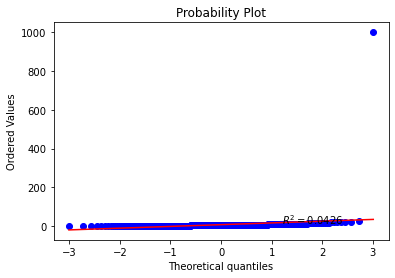

In [29]:
stats.probplot(df2['wage'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [30]:
# Vamos a limpiar el valor Atipico
# Primero ordenaremos los valores de menor a mayor

df2 = df2.sort_values('wage')
df2

,wage,educ,exper,tenure,nonwhite,female,married,numdep
23,0.53,12,3,1,0,1,0,0
515,1.43,12,17,0,0,1,1,2
127,1.50,8,31,30,0,0,0,0
452,1.50,12,11,1,0,1,1,2
50,1.63,12,18,0,0,1,0,2
...,...,...,...,...,...,...,...,...
185,21.86,12,24,16,0,0,1,3
14,22.20,12,31,15,0,0,1,1
228,22.86,16,16,7,0,0,1,2
111,24.98,18,29,25,0,0,1,0


In [31]:
df2 = df2[df2['wage']<1000]
df2

,wage,educ,exper,tenure,nonwhite,female,married,numdep
23,0.53,12,3,1,0,1,0,0
515,1.43,12,17,0,0,1,1,2
127,1.50,8,31,30,0,0,0,0
452,1.50,12,11,1,0,1,1,2
50,1.63,12,18,0,0,1,0,2
...,...,...,...,...,...,...,...,...
58,21.63,18,8,8,0,1,0,0
185,21.86,12,24,16,0,0,1,3
14,22.20,12,31,15,0,0,1,1
228,22.86,16,16,7,0,0,1,2


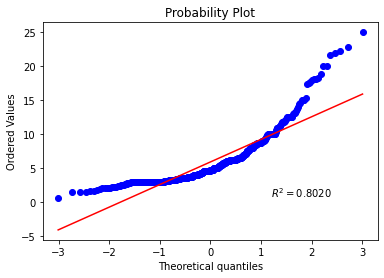

In [32]:
stats.probplot(df2['wage'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

In [33]:
reg = smf.ols('wage ~ educ + exper + tenure +nonwhite + female + married + numdep', data=df2) 
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     43.44
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.29e-48
Time:                        17:36:06   Log-Likelihood:                -1309.3
No. Observations:                 525   AIC:                             2635.
Df Residuals:                     517   BIC:                             2669.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9825      0.783     -2.531      0.0

### Caso 1

In [34]:
reg = smf.ols('wage ~  female ', data=df2) 
res = reg.fit()
print(res.summary())
#Fisher menor que 0, rechazo hipotesis nula, la variable mujer tiene una relacion con el salario.
# Dejando las demas variables constantes, la mujeres ganan 2.5 unidades monetarias menos.
# El intercepto, cuando tengo una variable significa que en promedio los hombres ganan 7,09.

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     68.25
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.19e-15
Time:                        17:36:06   Log-Likelihood:                -1398.6
No. Observations:                 525   AIC:                             2801.
Df Residuals:                     523   BIC:                             2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0995      0.210     33.774      0.0

### Caso 2

In [35]:
import statsmodels.formula.api as smf
reg = smf.ols('wage~  female + married   ', data=df2) 
res = reg.fit()
print(res.summary())

# Interpretacion de la variable casado:
 # Dejando las demas variables constantes, los casados ganan 1.34 unidades monetarias más que los solteros.
 # P  Value da 0, así que estadisticamente significativo
 # Los hombres no casados ganan 6,2 aprox unidades monetarias, estadisticamente significativo.

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     44.64
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           1.27e-18
Time:                        17:36:07   Log-Likelihood:                -1389.3
No. Observations:                 525   AIC:                             2785.
Df Residuals:                     522   BIC:                             2797.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1785      0.297     20.820      0.0